# Selenium 개요

## 1. Selenium
- 웹페이지 테스트 자동화를 할 수 있는 프레임워크
- 셀레니움 사용하면 완전한 형태의 웹 페이지 소스를 볼 수 있기 때문에 스크래핑할 때 유용

## 2. 사용 예
- 자바스크립트가 동적으로 만든 데이터 스크래핑할 때
- 사이트의 다양한 HTML 요소에 클릭, 키보드 입력 등 이벤트를 줄 때

## 3. selenium 설치
```
pip install selenium
```

## 4. 사용 방법

### 4.1 WebDriver 사용 방법(4.11.0 버전 이전)

- 셀레니움을 사용하려면 사용중인 웹 브라우저의 드라이버 파일을 다운로드해야 함
- 크롬 드라이버 파일 다운로드 받기
```
chrome://version/ 버전 확인
https://chromedriver.chromium.org/downloads 에서 chrome 버전과 운영체제에 맞는 드라이버 다운로드
압축 푼 뒤 응용 프로그램을 현재 작업 디렉토리에 카피
```

### 4.2 WebDriver 사용 방법(4.11.0 버전 이후)
- Selenium Manager가 로컬에 설치된 브라우저의 버전을 감지하고, 해당하는 드라이버의 버전을 찾아서 자동으로 다운로드 하므로 추가 작업 필요 없음
`

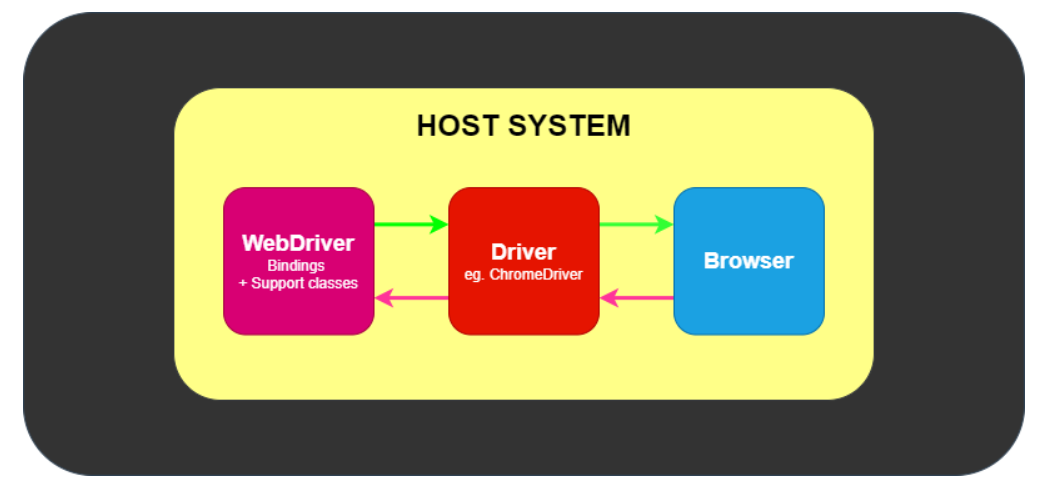

In [87]:
from IPython.display import Image
Image('./file/0521/webdriver.png')

# Selenium 시작하기

* 참고사이트
```
https://www.selenium.dev/documentation/webdriver/getting_started/
```    

In [88]:
import selenium
from selenium import webdriver

import requests
import time

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import pandas as pd
from io import StringIO
print(selenium.__version__)

4.32.0


## Selenium을 사용하여 Chrome 웹 브라우저를 조작

In [89]:
driver = webdriver.Chrome()

In [90]:
driver.get('https://naver.com')

In [91]:
driver.back()

In [92]:
driver.forward()

In [93]:
driver.refresh()

In [94]:
driver.quit()

## Selenium에서 웹 요소 찾기
- 더 자세한 내용은
```
https://www.selenium.dev/documentation/webdriver/elements/
```

**find_element(By.TAG_NAME, tag_name)**

In [95]:
driver = webdriver.Chrome()
driver.get('https://naver.com')

elem = driver.find_element(By.TAG_NAME, 'a')
elem.get_attribute('href')

'https://www.naver.com/#topAsideButton'

In [96]:
driver.quit()

In [97]:
driver = webdriver.Chrome()
driver.get('https://naver.com')

elems = driver.find_elements(By.TAG_NAME, 'a')
len(elems)

162

**find_element(By.ID, 'element_id')**

In [75]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.ID, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem = driver.find_element(By.ID, 'search-btn')
elem.click()
time.sleep(1)
driver.quit()

In [76]:
elem = driver.find_element(By.ID, 'search-btn')
elem.click()

driver.quit()

KeyboardInterrupt: 

**find_element(By.NAME, 'element_name')**

**find_element(By.XPATH, 'xpath_expression')**

In [ ]:
driver = webdriver.Chrome()
driver.get('https://naver.com')
time.sleep(1)

elem = driver.find_element(By.ID, 'query')
elem.send_keys('파이썬')
time.sleep(1)

elem = driver.find_element(By.XPATH, '//*')
elem.click()
time.sleep(1)
driver.quit()

**find_element(By.CSS_SELECTOR, 'css_selector')**

**find_element(By.LINK_TEXT, 'link_text')**

## **실습 1**

**다음 영화순위 검색에서 스크랩핑하기**
- 썸네일 이미지 저장하기

In [47]:
import urllib.request

In [51]:
driver = webdriver.Chrome()
driver.get('https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')
time.sleep(1)


# CSS 선택자로 썸네일 이미지들 모두 가져오기
images = driver.find_elements(By.CSS_SELECTOR, 'c-thumb img')  # 또는 'img'로 먼저 시도해도 됨

# 앞 5개 썸네일 저장
for i, img in enumerate(images[:5], start=1):
    src = img.get_attribute('src')
    if src and src.startswith('http'):
        urllib.request.urlretrieve(src, f'thumbnail_{i}.jpg')
        print(f'thumbnail_{i}.jpg 저장 완료')
    else:
        print(f'[{i}] 유효하지 않은 이미지 URL')

driver.quit()

https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F03f59362395786bdbb61b1c442625a28cd0c92da
thumbnail_1.jpg 저장 완료
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fmovie-private%2Fd430d635dfce41959f1d72b36cc3d41ac9b62735
thumbnail_2.jpg 저장 완료
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F8f11b97fe0fa542d409202f4ccf99e0443e8d5fc
thumbnail_3.jpg 저장 완료
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fbec4db6e469f8fb0a7608de3bea5b5c9dfc1d97d
thumbnail_4.jpg 저장 완료
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4defc7141266ab2bb9275a5796d9bb76c92d148d
thumbnail_5.jpg 저장 완료


- 현재 보이는 페이지에서 10개 thumbnail 이미지의 링크 (1-10위)

In [32]:
# todo
driver = webdriver.Chrome()
driver.get('https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')
time.sleep(1)


# CSS 선택자로 썸네일 이미지들 모두 가져오기
images = driver.find_elements(By.CSS_SELECTOR, 'c-thumb img')  # 또는 'img'로 먼저 시도해도 됨

# 앞 5개 썸네일 저장
for i, img in enumerate(images[:10], start=1):
    src = img.get_attribute('src')
    if src and src.startswith('http'):
        urllib.request.urlretrieve(src, f'thumbnail_{i}.jpg')
        print(f'thumbnail_{i}.jpg 저장 완료')
    else:
        print(f'[{i}] 유효하지 않은 이미지 URL')

driver.quit()

- 오른쪽 버튼 클릭해서 10개 thumbnail 이미지의 링크 (11-20위)

In [ ]:
# todo
# todo
driver = webdriver.Chrome()
driver.get('https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')
time.sleep(1)

try:
    next_button = driver.find_element(By.CSS_SELECTOR, '#mor_history_id_0 > div > div.compo-paging > button.btn_next')
    next_button.click()
    next_button.click()
    print("다음 페이지로 이동했습니다.")
except:
    print("다음 버튼을 찾지 못했습니다.")

다음 페이지로 이동했습니다.


- 전체 2024년도 thumbnail 이미지 가져오기

In [13]:
# Selenium 웹드라이버 실행을 위한 모듈 및 기타 유틸 모듈 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib.request
import time

# 크롬 웹브라우저를 자동으로 실행
driver = webdriver.Chrome()

# 다음(Daum) 영화 순위 검색 페이지 접속
driver.get('https://search.daum.net/search?w=tot&q=2024%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR')

# 웹 페이지가 로딩될 시간을 1초 동안 기다림
time.sleep(1)

# '다음 페이지' 버튼 요소를 찾아서 변수에 저장
# 주의: 이 요소는 이후 페이지에서 다시 로드되지 않기 때문에 loop 안에서 다시 찾는 게 안정적임
next_button = driver.find_element(By.CSS_SELECTOR, '#mor_history_id_0 > div > div.compo-paging > button.btn_next')

# 1페이지부터 3페이지까지 반복 (총 3번)
for page in range(1, 4):
    # 현재 페이지 번호를 기준으로 해당 페이지에 있는 썸네일 이미지들만 선택
    images = driver.find_elements(By.CSS_SELECTOR, f'#mor_history_id_0 > div > div.flipsnap_view > div > div:nth-child({page}) c-thumb img')

    # 앞에서부터 10개의 이미지를 순회하면서 처리
    for i, img in enumerate(images[:10], start=1):
        # 각 이미지 태그의 src 속성(이미지 URL)을 가져옴
        src = img.get_attribute('src')

        # src가 있고, http로 시작하면 유효한 이미지로 간주
        if src and src.startswith('http'):
            print(src)  # 이미지 URL 출력 (원하면 이 부분에서 저장 처리도 가능)
        else:
            print(f'[{i}] 유효하지 않은 이미지 URL')  # 유효하지 않은 경우 출력

    # 마지막 페이지가 아니면 다음 버튼을 클릭해서 페이지 넘기기
    try:
        next_button.click()  # 다음 페이지 버튼 클릭
        time.sleep(2)  # 다음 페이지가 로드될 시간을 기다림
    except:
        pass  # 버튼을 찾지 못하거나 오류가 나면 넘어감

# 브라우저 종료 (리소스 해제)
driver.quit()


https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F03f59362395786bdbb61b1c442625a28cd0c92da
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fmovie-private%2Fd430d635dfce41959f1d72b36cc3d41ac9b62735
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F8f11b97fe0fa542d409202f4ccf99e0443e8d5fc
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fbec4db6e469f8fb0a7608de3bea5b5c9dfc1d97d
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4defc7141266ab2bb9275a5796d9bb76c92d148d
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F630a0a90f481f8dc6692d63131b6fc6076c6d0e2
https://search1.kakaocdn.net/thumb/R232x328.fwebp.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fceed86e067c5be891c8fcff3e86fa6be08fb63

- 2024년도로부터 2015년도까지 이미지 링크


- **(최종)** 2024년도로부터 2015년도까지 상위 10위까지의 썸네일 이미지 파일로 저장

In [36]:
!mkdir movie_images

In [37]:
# todo


## **실습 2**
**네이버 증권(국내 증시)**
- https://finance.naver.com/sise/sise_market_sum.naver
- 관심 시가 총액 옵션 변경해 보면 스크랩핑하기

In [37]:
user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
url = 'https://finance.naver.com/sise/sise_market_sum.naver'

options = webdriver.ChromeOptions()
options.add_argument(user_agent)

driver = webdriver.Chrome(options=options)

# todo
driver.get(url)

checkboxes = driver.find_elements(By.NAME, 'fieldIds')

for checkbox in checkboxes:
    if checkbox.is_selected():
        checkbox.click()
        time.sleep(0.5)

items_to_select = ['거래량', '시가', '고가', '저가']
for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, "..")
    label = parent.find_element(By.TAG_NAME, 'label')
    if label.text in items_to_select:
        checkbox.click()
        
# 적용하기 버튼
btn_apply = driver.find_element(By.CSS_SELECTOR, '#contentarea_left > div.box_type_m > form > div > div > div > a:nth-child(1) > img')
btn_apply.click()

In [47]:
data = pd.read_html(driver.page_source)
len(data)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35672\1687385026.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(driver.page_source)


3

In [48]:
df = data[1]
df.head()

,N,종목명,현재가,전일비,등락률,액면가,거래량,시가,고가,저가,토론실,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,55850.0,하락 50,-0.09%,100.0,6774442.0,56200.0,56600.0,55800.0,NaN,NaN,NaN
2,2.0,SK하이닉스,200500.0,"하락 1,500",-0.74%,5000.0,1438935.0,204500.0,205000.0,199900.0,NaN,NaN,NaN
3,3.0,삼성바이오로직스,1100000.0,"상승 73,000",+7.11%,2500.0,201642.0,1033000.0,1119000.0,1032000.0,NaN,NaN,NaN
4,4.0,LG에너지솔루션,278000.0,"하락 1,500",-0.54%,500.0,165209.0,278500.0,285000.0,277500.0,NaN,NaN,NaN


In [57]:
df.dropna(axis=1,how='all', inplace=True)
df.dropna(axis=0,how='all', inplace=True)
df.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35672\734277297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1,how='all', inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35672\734277297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,how='all', inplace=True)


TypeError: 'tuple' object is not callable

## **실습 3**
**다음 뉴스**
- http://news.daum.net

In [94]:
selenium_user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
url = 'http://news.daum.net'

options = webdriver.ChromeOptions()
options.add_argument(selenium_user_agent)

driver = webdriver.Chrome(options=options)

# todo
driver.get(url)

# 데이터를 담을 리스트 초기화
titles = []
links = []
numes = []

# 섹션 넘기는 코드
for i in range(3, 12):
    btn_change = driver.find_element(By.CSS_SELECTOR, f'#gnbContent > div > div > div > div > div > div:nth-child({i}) > a > span')
    btn_change.click()
    time.sleep(0.5)
    
    # 모든 strong.tit_txt 요소 가져오기
    elements = driver.find_elements(By.CLASS_NAME, 'tit_txt')
    a_tags = driver.find_elements(By.CSS_SELECTOR, 'a.item_newsheadline2')
    info_blocks = driver.find_elements(By.CSS_SELECTOR, 'span.info_txt')

    # 최대 9개까지만 수집
    for el, a, t in zip(elements[:9], a_tags[:9], info_blocks[:9]):
        info_spans = t.find_elements(By.CLASS_NAME, 'txt_info')

        numes.append(i-3)
        titles.append(el.text + "\\n" + info_spans[0].text + " " + info_spans[1].text)
        links.append(a.get_attribute('href'))

# 브라우저 닫기
driver.quit()

# DataFrame 생성
df = pd.DataFrame({
    '섹션': numes,
    '제목': titles,
    '링크': links
})

# 결과 출력
df   

,섹션,제목,링크
0,0,"온실가스 감축·배출권 확보 동시에…KOMSA, 해운업계 전폭 지원\n머니투데이 17분 전",https://v.daum.net/v/20250521160119641
1,0,기후변화로 서식지 잃어가는 '꿀벌' 위한 '1호 밀원정원' 북서울꿈의숲에 생겼다!\...,https://v.daum.net/v/20250521155351200
2,0,"청남대서 치킨·맥주? 환경단체 ""상수원보호구역 위반""\n오마이뉴스 43분 전",https://v.daum.net/v/20250521153608380
3,0,"환경 단체 ""대선 후보들은 희생 강요하는 친핵 정책 폐기하라"" 촉구\n노컷뉴스 2시간 전",https://v.daum.net/v/20250521143901637
4,0,"환경단체-부산시, 법정 공방 2라운드…“대저대교 건설 중지냐, 강행이냐”\n경향신문...",https://v.daum.net/v/20250521132657630
...,...,...,...
76,8,‘한국옵티칼하이테크 고공농성 500일’ 1박2일 취재…박정혜 “난 아직 내 할 일을...,https://v.daum.net/v/20250521060128720
77,8,[新부자유친] 유량 고수 아버지와 마케팅 고수 아들이 만났다 | 월간축산\n농민신문...,https://v.daum.net/v/20250521060030597
78,8,70년 지기 동행자… 정치관 달라도 문학 보는 눈은 똑같았지\n조선일보 14시간 전,https://v.daum.net/v/20250521015610910
79,8,“한국은 저희의 인생목표입니다”…이 나라에선 ‘한류’가 선망의 대상\n매일경제 20...,https://v.daum.net/v/20250520203302582


In [40]:
# 상세 기사 내용 가져오기
# todo
